# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | constantia
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | port lincoln
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | beaufort west
Processing Record 11 of Set 1 | alotau
City not found. Skipping...
Processing Record 12 of Set 1 | anna regina
Processing Record 13 of Set 1 | santiago papasquiaro
City not found. Skipping...
Processing Record 14 of Set 1 | el trebol
Processing Record 15 of Set 1 | udachny
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | quellon
Processing Record 19 of Set 1 | christchurch
Processing Record 20 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,constantia,44.1833,28.6500,20.38,62,1,2.67,RO,1691037591
1,tiksi,71.6872,128.8694,5.54,89,100,6.28,RU,1691037721
2,edinburgh of the seven seas,-37.0676,-12.3116,13.91,83,96,17.53,SH,1691037721
3,yellowknife,62.4560,-114.3525,18.29,59,75,3.09,CA,1691037661
4,port lincoln,-34.7333,135.8667,22.04,43,80,10.40,AU,1691037722


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,20.38,62,1,2.67,RO,1691037591
1,tiksi,71.6872,128.8694,5.54,89,100,6.28,RU,1691037721
2,edinburgh of the seven seas,-37.0676,-12.3116,13.91,83,96,17.53,SH,1691037721
3,yellowknife,62.4560,-114.3525,18.29,59,75,3.09,CA,1691037661
4,port lincoln,-34.7333,135.8667,22.04,43,80,10.40,AU,1691037722


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

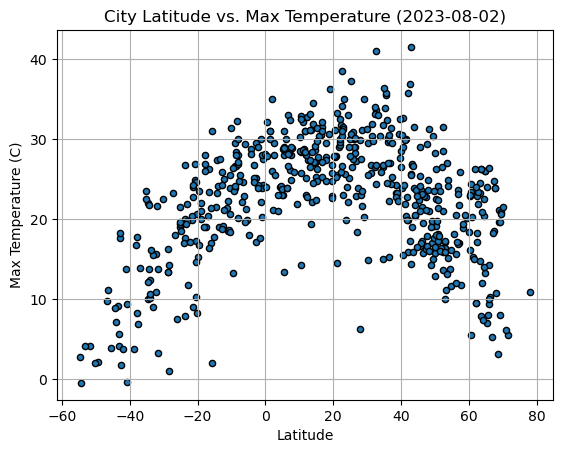

In [8]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties

city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True,
                    title="City Latitude vs. Max Temperature (2023-08-02)", 
                    xlabel="Latitude", 
                    ylabel="Max Temperature (C)",
                    edgecolors="black")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

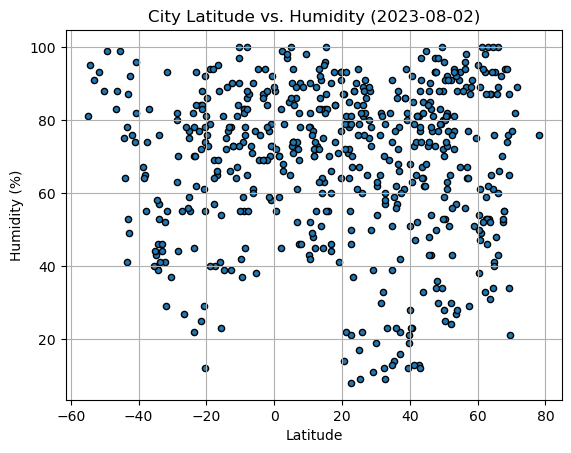

In [9]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties

city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True,
                    title="City Latitude vs. Humidity (2023-08-02)", 
                    xlabel="Latitude", 
                    ylabel="Humidity (%)",
                    edgecolors="black")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

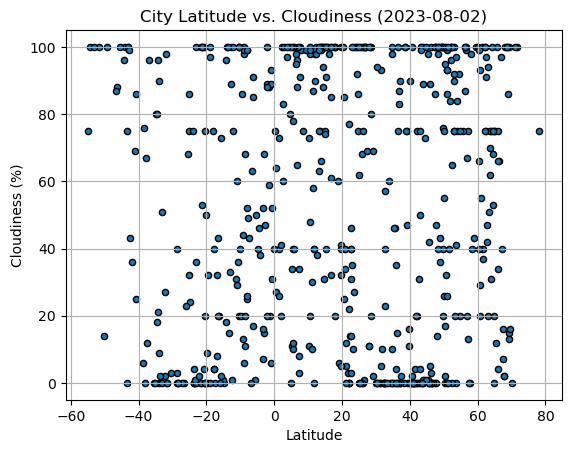

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties

city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True,
                    title="City Latitude vs. Cloudiness (2023-08-02)", 
                    xlabel="Latitude", 
                    ylabel="Cloudiness (%)",
                    edgecolors="black")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

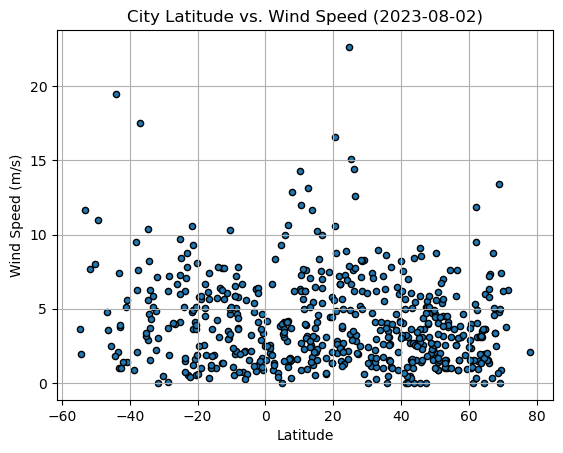

In [11]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties

city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True,
                    title="City Latitude vs. Wind Speed (2023-08-02)", 
                    xlabel="Latitude", 
                    ylabel="Wind Speed (m/s)",
                    edgecolors="black")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def regression(x_values, y_values):
    regress_values = x_values*linregress(x_values, y_values)[0] + linregress(x_values, y_values)[1]

    line_eq = "y = " + str(round(linregress(x_values, y_values)[0],2)) + "x +" + str(round(linregress(x_values, y_values)[1],2))
    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)

    print(f"The r-value is: {linregress(x_values, y_values)[2]}")

    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,20.38,62,1,2.67,RO,1691037591
1,tiksi,71.6872,128.8694,5.54,89,100,6.28,RU,1691037721
3,yellowknife,62.4560,-114.3525,18.29,59,75,3.09,CA,1691037661
9,anna regina,7.2644,-58.5077,26.09,82,3,1.47,GY,1691037723
11,udachny,66.4167,112.4000,10.25,66,66,7.33,RU,1691037389


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,edinburgh of the seven seas,-37.0676,-12.3116,13.91,83,96,17.53,SH,1691037721
4,port lincoln,-34.7333,135.8667,22.04,43,80,10.40,AU,1691037722
5,bredasdorp,-34.5322,20.0403,10.00,40,80,2.92,ZA,1691037722
6,port-aux-francais,-49.3500,70.2167,2.16,99,100,10.95,TF,1691037722
7,adamstown,-25.0660,-130.1015,21.44,75,32,9.68,PN,1691037722


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5720680965137641


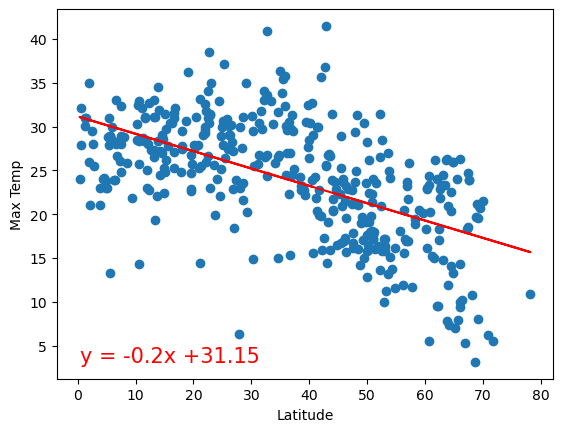

In [15]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

The r-value is: 0.7565627110740045


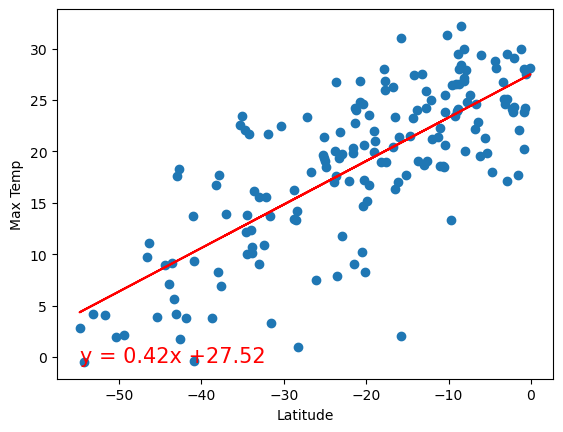

In [16]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.05244124737908741


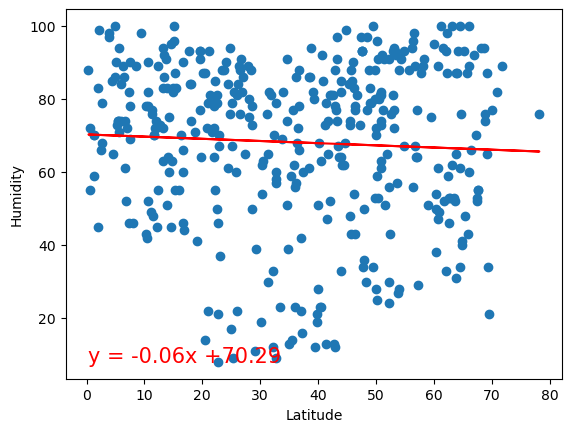

In [17]:
# Northern Hemisphere
regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

The r-value is: 0.08393374003358797


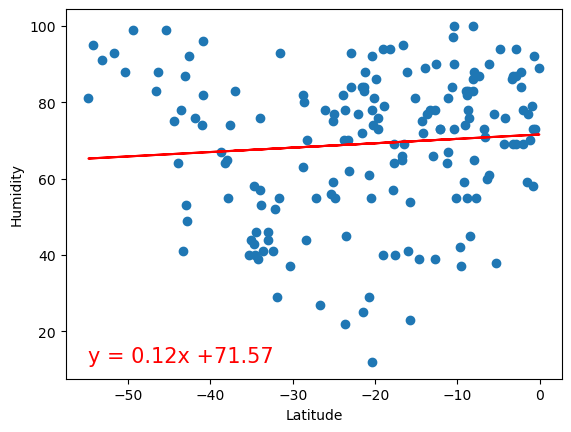

In [18]:
# Southern Hemisphere
regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.053321079527851506


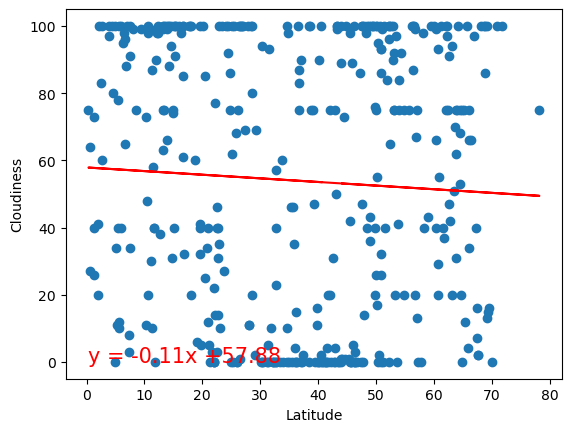

In [19]:
# Northern Hemisphere
regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

The r-value is: -0.06318640632104339


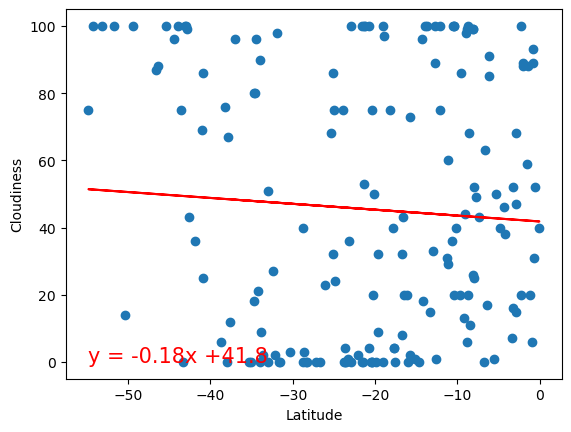

In [20]:
# Southern Hemisphere
regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.14329562821244415


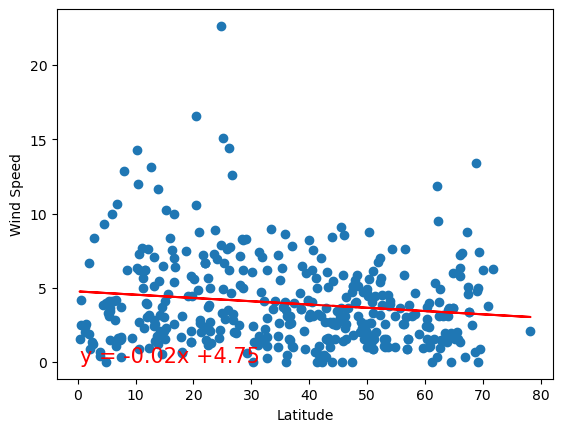

In [21]:
# Northern Hemisphere
regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

The r-value is: -0.21878869997540387


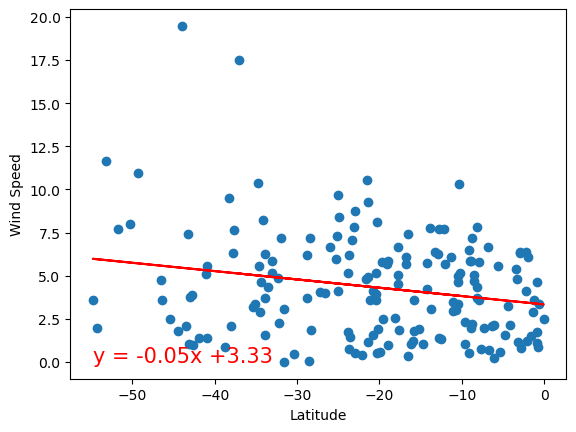

In [22]:
# Southern Hemisphere
regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE